In [1]:
#import necessary libraries or dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression



RSEED=42

In [2]:
#import the data
df_credit_card = pd.read_csv('../data/creditcard.csv')

In [3]:
#first 5 rows of the dataset
df_credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#last 5 rows of the dataset
df_credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#get the general overview of the data

df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are 284807 total entries having 31 columns

In [6]:
# are there missing values?

df_credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

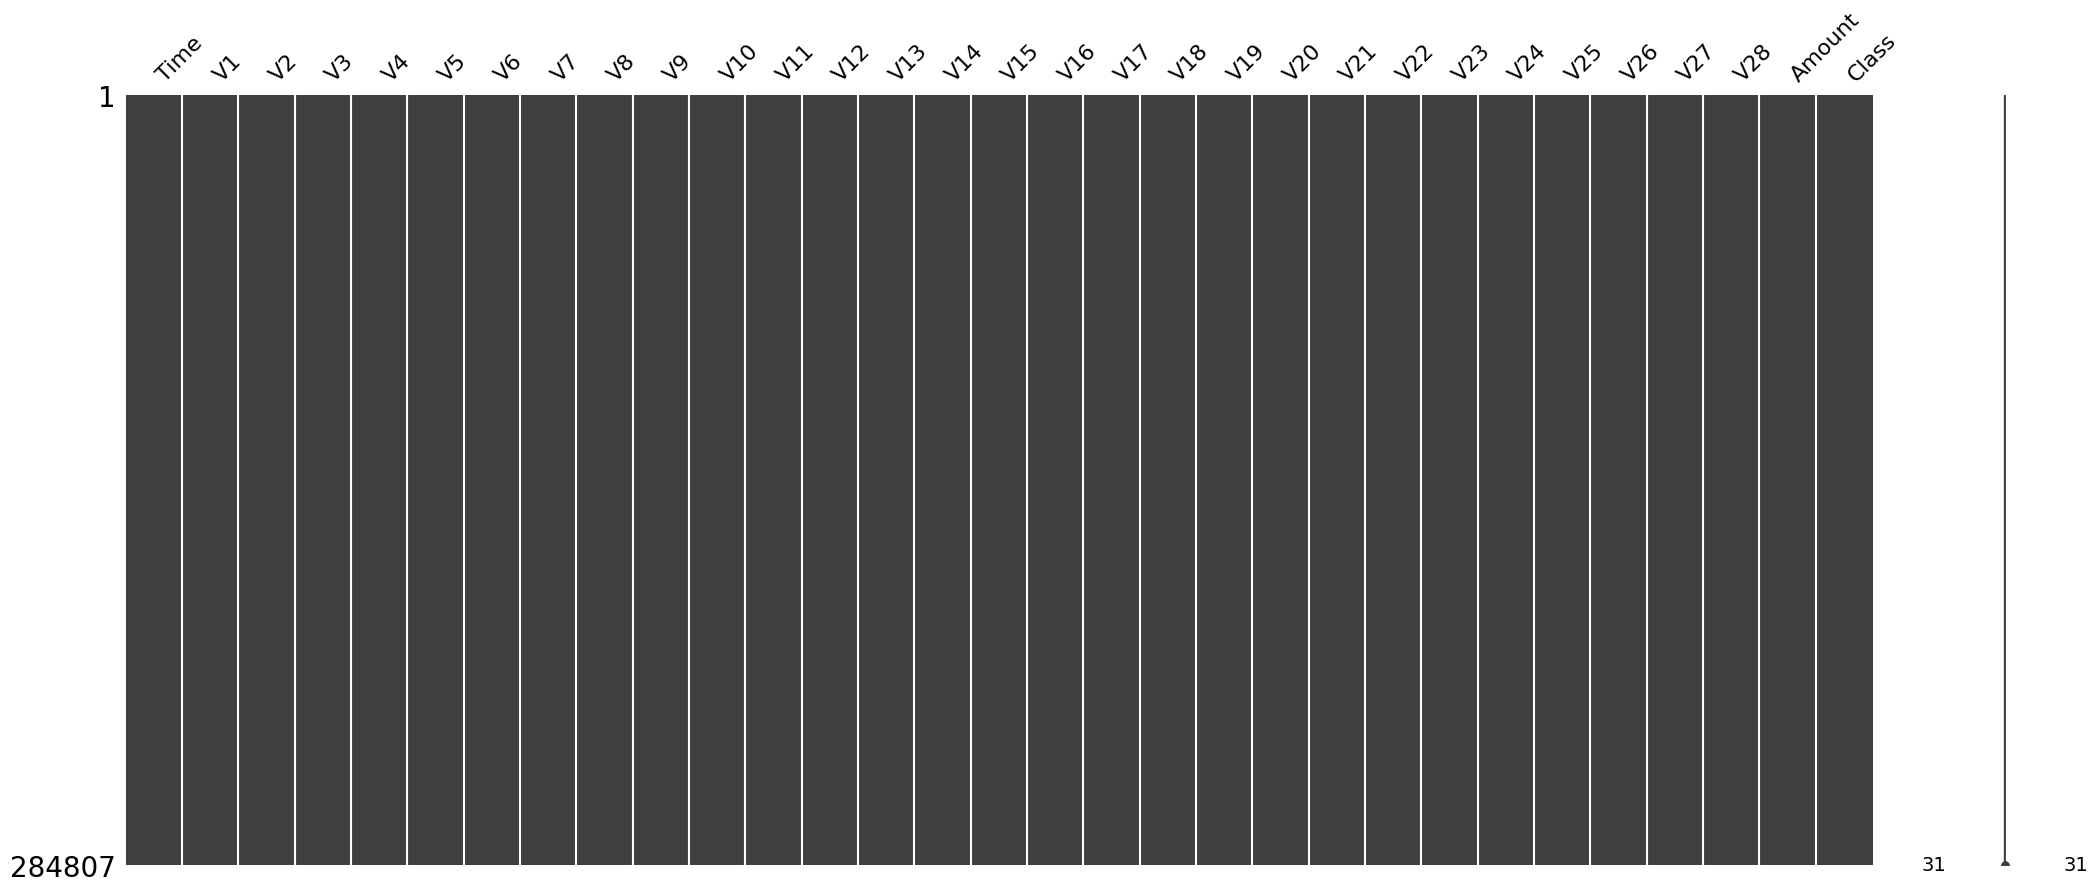

In [7]:
msno.matrix(df_credit_card)

In [8]:
df_credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# class distribution
#label '0' = non_fraudulent transactions
#label '1' = fraudulent transactions


df_credit_card['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### The dataset is highly imbalance, and training a machine learning model with such will result in biasness in favour of the non-fraudulent transactions

In [10]:
# separation of the Dataset by class labels

fraudulent = df_credit_card[df_credit_card.Class == 1]

non_fraudulent = df_credit_card[df_credit_card.Class == 0]

In [11]:
# check the shapes of the separated classes

print(fraudulent.shape)

print (non_fraudulent.shape)

(492, 31)
(284315, 31)


In [12]:
# statistical measures of transaction amount by class

fraudulent['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
non_fraudulent['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
# comparing the mean values of each column by class label

df_credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Using the undersmapling method to deal with the imbalanceness

The fraudulent transactions have 492 values, therefore, I will randomly select 492 values from the non_fraudulent transaction values, which I will in turn concatenate with the fraudulent transaction

In [15]:
non_fraudulent_sample = non_fraudulent.sample(n=492)

check for randomness, taking note of the serial numbers

In [16]:
non_fraudulent_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
191674,129364.0,2.037582,-1.138770,-0.528958,-0.949431,-1.047013,-0.320483,-0.985205,0.015390,-0.156126,...,0.015086,-0.093951,0.278815,-0.430869,-0.496385,-0.486178,-0.001755,-0.044635,65.00,0
171239,120551.0,1.891535,0.535479,-0.709675,3.634781,0.631064,0.332533,0.138409,-0.039912,-1.261903,...,0.339149,1.115182,-0.069515,-0.348890,0.254252,0.245513,-0.027596,-0.062955,10.62,0
269573,163687.0,1.941593,-0.234291,-0.209005,0.229510,-0.577919,-0.459755,-0.491668,0.006575,0.910383,...,-0.044316,0.031159,0.346780,-0.014667,-0.390570,-0.946944,0.065277,-0.034703,1.00,0
122152,76453.0,1.325066,0.376343,-0.086458,0.459260,0.159826,-0.502476,0.110844,-0.179217,-0.000976,...,-0.343779,-0.954470,0.001541,-0.608061,0.367856,0.152343,-0.020030,0.022406,1.79,0
157325,109836.0,2.090466,0.043765,-1.357207,0.371491,0.268589,-0.837256,0.033811,-0.338488,2.125273,...,0.101663,0.662533,0.020517,0.610392,0.323212,-0.485275,-0.026795,-0.055409,1.00,0


In [17]:
non_fraudulent_sample.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
276080,166888.0,0.399374,-3.733398,-3.930808,-0.396620,-0.344047,-0.521238,1.560201,-0.626412,-1.210789,...,1.066135,0.788250,-1.140370,0.209994,0.433434,0.184727,-0.299881,0.066801,1000.00,0
51180,44829.0,-0.353446,0.683338,1.126830,1.123197,0.230055,-0.035678,1.109914,-0.103285,-0.793058,...,0.111525,0.459337,0.075394,0.197347,-0.065553,-0.275433,0.133687,-0.113193,97.00,0
39785,39964.0,0.929105,-0.600536,0.339354,1.505585,-0.503326,0.417900,-0.199788,0.125262,1.104193,...,-0.097611,-0.350870,-0.348475,-0.611297,0.723678,-0.238203,0.017943,0.040634,165.00,0
51501,44981.0,1.036814,-0.785145,0.664173,-0.824767,-1.150219,-0.260141,-0.622914,0.136140,1.677809,...,0.221277,0.635896,-0.266721,0.040210,0.587713,-0.537050,0.068983,0.035619,100.00,0
251555,155393.0,0.615517,-3.503526,0.086630,1.512135,-2.409836,1.556093,-1.132614,0.419379,1.145263,...,0.190464,0.012366,-0.440863,-0.465007,-0.501280,-0.532180,0.027847,0.089166,686.45,0


In [18]:
non_fraudulent_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 191674 to 251555
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64
 22 

In [19]:
# concatenating the sample and the fraudulent
new_credit_card_df = pd.concat([fraudulent, non_fraudulent_sample], axis=0)

In [20]:
new_credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [21]:
new_credit_card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
276080,166888.0,0.399374,-3.733398,-3.930808,-0.396620,-0.344047,-0.521238,1.560201,-0.626412,-1.210789,...,1.066135,0.788250,-1.140370,0.209994,0.433434,0.184727,-0.299881,0.066801,1000.00,0
51180,44829.0,-0.353446,0.683338,1.126830,1.123197,0.230055,-0.035678,1.109914,-0.103285,-0.793058,...,0.111525,0.459337,0.075394,0.197347,-0.065553,-0.275433,0.133687,-0.113193,97.00,0
39785,39964.0,0.929105,-0.600536,0.339354,1.505585,-0.503326,0.417900,-0.199788,0.125262,1.104193,...,-0.097611,-0.350870,-0.348475,-0.611297,0.723678,-0.238203,0.017943,0.040634,165.00,0
51501,44981.0,1.036814,-0.785145,0.664173,-0.824767,-1.150219,-0.260141,-0.622914,0.136140,1.677809,...,0.221277,0.635896,-0.266721,0.040210,0.587713,-0.537050,0.068983,0.035619,100.00,0
251555,155393.0,0.615517,-3.503526,0.086630,1.512135,-2.409836,1.556093,-1.132614,0.419379,1.145263,...,0.190464,0.012366,-0.440863,-0.465007,-0.501280,-0.532180,0.027847,0.089166,686.45,0


In [22]:
new_credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 541 to 251555
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22  V2

In [23]:
#reset index
new_credit_card_df.reset_index(inplace=True)

In [24]:
new_credit_card_df.head()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [25]:
new_credit_card_df = new_credit_card_df.drop(columns= 'index', axis=1)

In [26]:
new_credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,89076.355691,-2.358630,1.832928,-3.512300,2.243900,-1.563300,-0.679292,-2.795742,0.257669,-1.312822,...,0.345927,-0.035566,-0.018998,-0.044230,0.025804,0.039474,0.092520,0.053805,101.587754,0.500000
std,48521.908135,5.511518,3.676093,6.215342,3.214991,4.206364,1.741501,5.846632,4.889873,2.313978,...,2.821473,1.167645,1.171538,0.551220,0.679335,0.488788,1.001435,0.470071,225.158146,0.500254
min,231.000000,-30.552380,-13.637914,-31.103685,-4.094979,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.170992,-7.263482,-1.869290,0.000000,0.000000
25%,45928.000000,-2.877893,-0.105776,-5.074851,-0.145113,-1.803200,-1.534316,-3.078361,-0.209765,-2.298358,...,-0.204202,-0.562980,-0.239023,-0.368406,-0.327426,-0.275949,-0.055022,-0.053644,1.290000,0.000000
50%,83901.500000,-0.781848,0.997118,-1.326752,1.287041,-0.457173,-0.639502,-0.687565,0.154830,-0.747964,...,0.110007,-0.040648,-0.031389,0.024574,0.056850,0.003716,0.049975,0.041257,17.995000,0.500000
75%,135766.250000,1.026972,2.833075,0.340322,4.202830,0.497801,0.067738,0.250073,0.877002,0.091501,...,0.662005,0.522562,0.207622,0.364552,0.401718,0.347313,0.454884,0.219773,99.990000,1.000000
max,171053.000000,2.321129,22.057729,3.177045,12.114672,11.095089,6.474115,6.103530,20.007208,6.754734,...,27.202839,8.361985,5.466230,1.104775,2.208209,2.845301,3.052358,4.949239,2125.870000,1.000000


In [27]:
#checking the values of each class

new_credit_card_df['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [28]:
new_credit_card_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97405.904472,0.054689,0.042078,0.008682,-0.054230,0.024625,0.039152,-0.022754,-0.055298,-0.044522,...,-0.021200,-0.021734,-0.085180,0.002313,0.016671,0.010158,0.027300,0.014465,0.031943,80.964187
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [29]:
# splitting into feature and target

X = new_credit_card_df.drop(columns= 'Class', axis=1)
y = new_credit_card_df['Class']

In [30]:
print(X)

         Time        V1        V2        V3        V4        V5        V6   
0       406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545  \
1       472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...       ...       ...       ...       ...       ...       ...   
979  166888.0  0.399374 -3.733398 -3.930808 -0.396620 -0.344047 -0.521238   
980   44829.0 -0.353446  0.683338  1.126830  1.123197  0.230055 -0.035678   
981   39964.0  0.929105 -0.600536  0.339354  1.505585 -0.503326  0.417900   
982   44981.0  1.036814 -0.785145  0.664173 -0.824767 -1.150219 -0.260141   
983  155393.0  0.615517 -3.503526  0.086630  1.512135 -2.409836  1.556093   

           V7        V8        V9  ...       V20       V21       V22   
0  

In [31]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
979    0
980    0
981    0
982    0
983    0
Name: Class, Length: 984, dtype: int64


In [32]:
print(X.shape)

print(y.shape)

(984, 30)
(984,)


In [33]:
# splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=RSEED)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (688, 30) (296, 30)


In [35]:
# training the model using logistics regression which is a simple model for binary classification

logreg = LogisticRegression()


In [36]:
# fitting the model

logreg.fit(X_train, y_train)

LogisticRegression()

In [37]:
# model evaluation

y_train_pred = logreg.predict(X_train)

X_train_accuracy = accuracy_score(y_train_pred, y_train)

In [38]:
print('Training data accuracy: ', X_train_accuracy)

Training data accuracy:  0.940406976744186


In [39]:
y_test_pred = logreg.predict(X_test)

X_test_accuracy = accuracy_score(y_test_pred, y_test)

In [40]:
print('Test data accuracy: ', X_test_accuracy)

Test data accuracy:  0.9290540540540541


In [41]:
# classification report
report = classification_report(y_test_pred, y_test)

print(report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       153
           1       0.91      0.94      0.93       143

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

